In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os

import torch
from torch.utils.data import Dataset

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

device = torch.device("cuda:0")

In [2]:
list_img = []
labels = []

directory = '../../new_data'

for name in os.listdir(directory + '/yes'):
    list_img.append('yes/' + name)
    labels.append(1)
    
for name in os.listdir(directory + '/no'):
    list_img.append('no/' + name)
    labels.append(0)

In [3]:
data = pd.DataFrame(np.array([list_img, labels]).T, columns=['path', 'class'])

### Fastai

In [4]:
from fastai.vision import *

In [5]:
data_train = ImageDataBunch.from_df(path = directory, df = data, size=200)

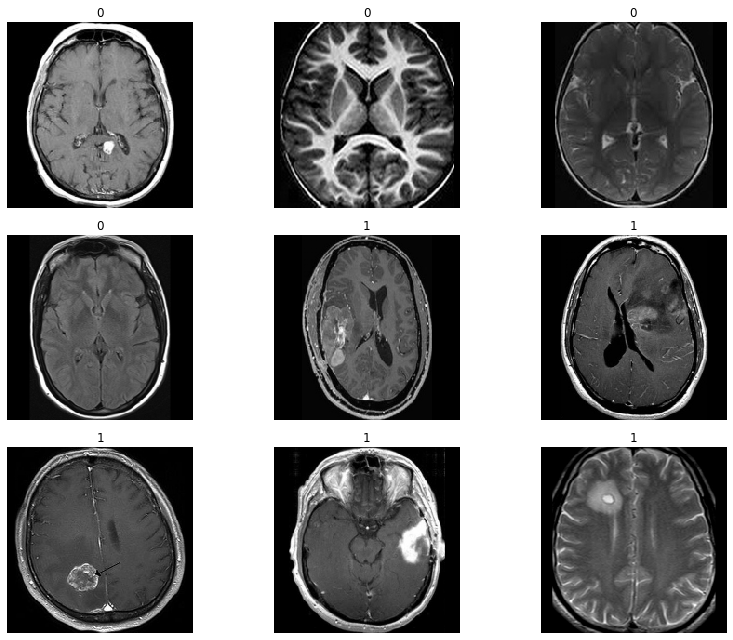

In [6]:
data_train.show_batch(rows = 3, figsize=(12,9))

In [7]:
cnn = models.resnet18

In [8]:
learn = cnn_learner(data_train, cnn, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


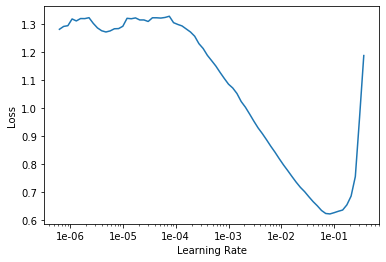

In [9]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time


In [11]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 2.00 GiB total capacity; 1.28 GiB already allocated; 8.62 MiB free; 25.91 MiB cached)